In [1]:
# Setting Up R enviornment 

library(tidyverse)
library(tidyr)
library(readr)
library(lubridate)
library(ggplot2)
library(corrplot)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory 

list.files(path = "../input")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
corrplot 0.92 loaded



[1] "fraud-detection"

# Day 1

Goal: Explore the dataset's basic structure (columns, rows, types) 

In [2]:
# load csv file: training dataset 
credit_card_fraud_df = read_csv('/kaggle/input/fraud-detection/fraudTrain.csv', show_col_types = FALSE)
# exploring the column specificication of the data with spec() function 
spec(credit_card_fraud_df)

New names:
• `` -> `...1`


cols(
  ...1 = col_double(),
  trans_date_trans_time = col_datetime(format = ""),
  cc_num = col_double(),
  merchant = col_character(),
  category = col_character(),
  amt = col_double(),
  first = col_character(),
  last = col_character(),
  gender = col_character(),
  street = col_character(),
  city = col_character(),
  state = col_character(),
  zip = col_double(),
  lat = col_double(),
  long = col_double(),
  city_pop = col_double(),
  job = col_character(),
  dob = col_date(format = ""),
  trans_num = col_character(),
  unix_time = col_double(),
  merch_lat = col_double(),
  merch_long = col_double(),
  is_fraud = col_double()
)

**Specifications of Columns (What do each specification mean?)**

* *col_double()*

    column containing numerical values with decimals

* *col_character()*
    
    column containing textual data ("characters")
    
* *col_date(format = "")*
    
    column containing dates 

In [3]:
# exploring names of columns within the dataset

names(credit_card_fraud_df)

[1] "...1"                  "trans_date_trans_time" "cc_num"               
 [4] "merchant"              "category"              "amt"                  
 [7] "first"                 "last"                  "gender"               
[10] "street"                "city"                  "state"                
[13] "zip"                   "lat"                   "long"                 
[16] "city_pop"              "job"                   "dob"                  
[19] "trans_num"             "unix_time"             "merch_lat"            
[22] "merch_long"            "is_fraud"

In [4]:
# gauging how the data is organized by printing the first five rows within the dataset

head(credit_card_fraud_df)

...1,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,⋯,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
<dbl>,<dttm>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,2019-01-01 00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,⋯,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.01129,-82.04832,0
1,2019-01-01 00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,⋯,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.15905,-118.18646,0
2,2019-01-01 00:00:51,3.885949e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,⋯,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.15070,-112.15448,0
3,2019-01-01 00:01:16,3.534094e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,⋯,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.03433,-112.56107,0
4,2019-01-01 00:03:06,3.755342e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,⋯,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.67500,-78.63246,0
5,2019-01-01 00:04:08,4.767265e+15,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,⋯,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.65338,-76.15267,0


# Day 2 

Dataset Overview 

Goal: Identify missing values and basic data characteristics 

In [5]:
# printing each class apparent within the dataframe

class(credit_card_fraud_df)

[1] "spec_tbl_df" "tbl_df"      "tbl"         "data.frame"

In [6]:
# identify missing values within the dataset 

missing_values = colSums(is.na(credit_card_fraud_df))
print(missing_values)

                 ...1 trans_date_trans_time                cc_num 
                    0                     0                     0 
             merchant              category                   amt 
                    0                     0                     0 
                first                  last                gender 
                    0                     0                     0 
               street                  city                 state 
                    0                     0                     0 
                  zip                   lat                  long 
                    0                     0                     0 
             city_pop                   job                   dob 
                    0                     0                     0 
            trans_num             unix_time             merch_lat 
                    0                     0                     0 
           merch_long              is_fraud 
                 

# Day 3

Basic Visualization 

Goal: Create simple charts (bar,line) to understand data distribution 

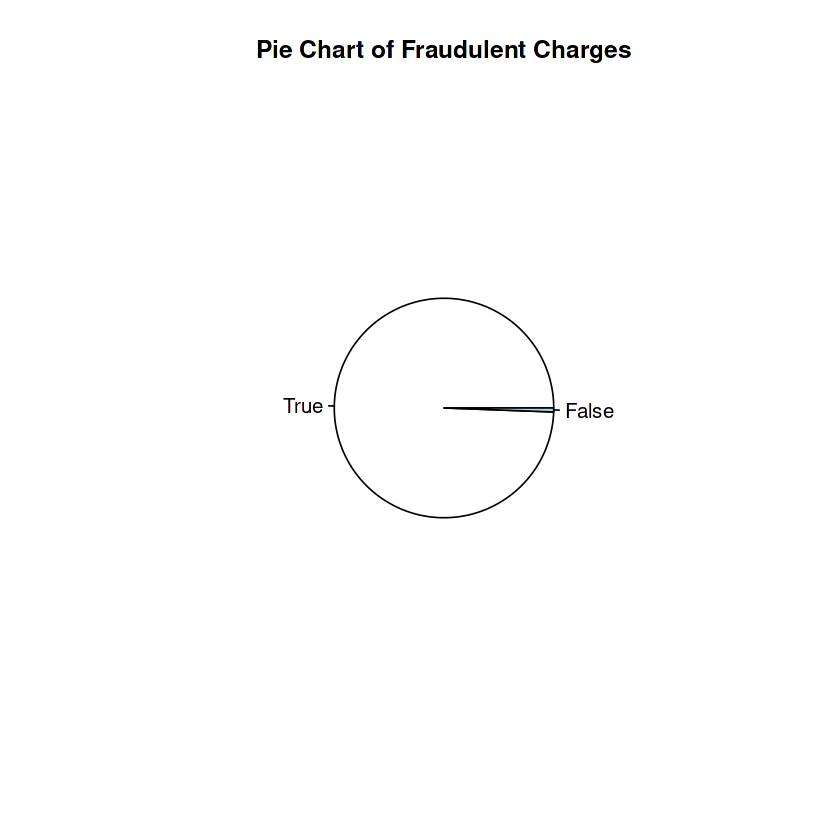

In [7]:
# gauging the distribution of is_fraud column in a pie chart

# Simple Pie Chart
table = table(credit_card_fraud_df$is_fraud)
lbls <- c("True", "False")
pie(table, labels = lbls, main="Pie Chart of Fraudulent Charges")

# Day 4 

Basic Visualization 

Identify basic patterns or trends in the data 

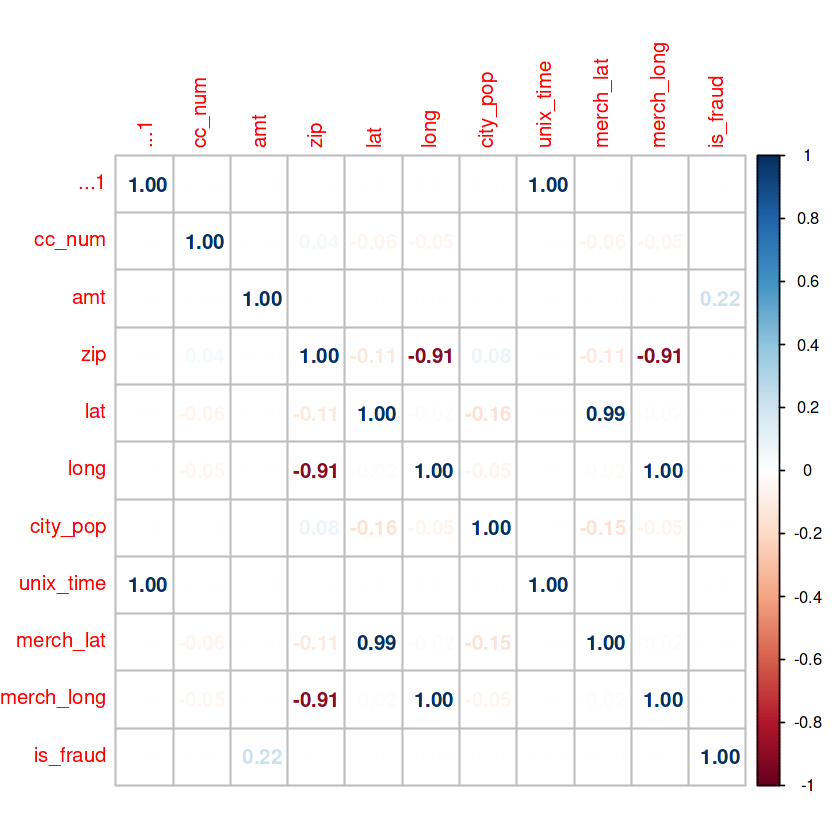

In [8]:
# gauge correlation between each of the columns with a correlation heat map 

numeric_data = credit_card_fraud_df[sapply(credit_card_fraud_df, is.numeric)]
matrix = cor(numeric_data)
corrplot(matrix, method = 'number')


# Day 5 

Descriptive Statistics 

Goal: Calculate basic statistics (mean, median, mode, and more) 

In [9]:
# printing summary statistics for each column 

summary(credit_card_fraud_df)

      ...1         trans_date_trans_time             cc_num         
 Min.   :      0   Min.   :2019-01-01 00:00:18   Min.   :6.042e+10  
 1st Qu.: 324168   1st Qu.:2019-06-03 19:12:22   1st Qu.:1.800e+14  
 Median : 648337   Median :2019-10-03 07:35:47   Median :3.521e+15  
 Mean   : 648337   Mean   :2019-10-03 12:47:28   Mean   :4.172e+17  
 3rd Qu.: 972506   3rd Qu.:2020-01-28 15:02:55   3rd Qu.:4.642e+15  
 Max.   :1296674   Max.   :2020-06-21 12:13:37   Max.   :4.992e+18  
   merchant           category              amt              first          
 Length:1296675     Length:1296675     Min.   :    1.00   Length:1296675    
 Class :character   Class :character   1st Qu.:    9.65   Class :character  
 Mode  :character   Mode  :character   Median :   47.52   Mode  :character  
                                       Mean   :   70.35                     
                                       3rd Qu.:   83.14                     
                                       Max.   :28948.90

In [10]:
# many of these columns are not numerical, for a specific numerical column, the mean can be calculated as:

avg_amt_fraud = mean(x = credit_card_fraud_df$amt)
print(avg_amt_fraud)

[1] 70.35104


# Day 6 and Day 7 

Descriptive Statistics and Summary Presentation 

Goal: Discuss findings and any surprising elements in the data. Prepare short presentable summary.

**Findings**

* Surprisingly, within the training dataset, the amount of fraudulent cases were close to none making an incredible imbalance for analysis
* There did not seem to be much correlation between the numerical columns within the dataset with only similarly holding data columns being correlated with each other

**Future Directions**

* This was my first time utilizing the R programming language for data analysis. I would have liked to integrate the ggplot package into data visualizations. 
* To tackle the imbalance in the fraudulent charges classification, oversampling or undersampling should be impelemented in future analysis. 